In [1]:
import pandas as pd
import numpy as np 

from pyhhmm.gaussian import GaussianHMM

import yfinance as yf

import matplotlib.pyplot as plt

from datetime import datetime

# Data Management

In [2]:
# Data Extraction
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")
symbol = "SPY"

# USE YAHOO FINANCE 
data = yf.download(symbol ,  start_date , end_date )
data = data[["Open" , "High" , "Low" , "Close" , "Volume"]]

[*********************100%***********************]  1 of 1 completed


In [3]:
# Add Returns and Range    
# Returns = (todays price divided by yesterdays)     # ROI since Yesterday
# Range   = (todays high price divided todays low)   # volitility from highest point to lowest within day

df = data.copy()
df["Returns"] = (df["Close"] / df["Close"].shift(1)) - 1
df["Range"]   = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)

df


,Open,High,Low,Close,Volume,Returns,Range
Date,,,,,,,
2020-01-03,321.160004,323.640015,321.100006,322.410004,77709700,-0.007572,0.007910
2020-01-06,320.489990,323.730011,320.359985,323.640015,55653900,0.003815,0.010519
2020-01-07,323.019989,323.540009,322.239990,322.730011,40496400,-0.002812,0.004034
2020-01-08,322.940002,325.779999,322.670013,324.450012,68296000,0.005330,0.009638
2020-01-09,326.160004,326.730011,325.519989,326.649994,48473300,0.006781,0.003717
...,...,...,...,...,...,...,...
2023-10-30,413.559998,416.679993,412.220001,415.589996,86562700,0.011956,0.010819
2023-10-31,416.179993,418.529999,414.209991,418.200012,79665200,0.006280,0.010430
2023-11-01,419.200012,423.500000,418.649994,422.660004,98068100,0.010665,0.011585


# HMM - Hidden States
- HMM is a model that looks for hidden states in the market
- states
    -  (upward) , (downward) , (sidways), and many more

In [4]:
# Structure Data (create a new dataframe using the returns and range)
x_train = df[[ "Returns" , "Range" ]]
x_train

,Returns,Range
Date,,
2020-01-03,-0.007572,0.007910
2020-01-06,0.003815,0.010519
2020-01-07,-0.002812,0.004034
2020-01-08,0.005330,0.009638
2020-01-09,0.006781,0.003717
...,...,...
2023-10-30,0.011956,0.010819
2023-10-31,0.006280,0.010430
2023-11-01,0.010665,0.011585


# HMM - Learning & Output
- Covarience Types
    - <b>Full</b> means the components may independently adopt any position and shape.

    - <b>Tied</b> means they have the same shape, but the shape may be anything.

    - <b>Diagonal</b> means the contour axes are oriented along the coordinate axes, but otherwise the eccentricities may vary between components.

    - <b>Tied Diagonal</b> is a "tied" situation where the contour axes are oriented along the coordinate axes. (I have added this because initially it was how I misinterpreted "diagonal.")

    - <b>Spherical</b> is a "diagonal" situation with circular contours (spherical in higher dimensions, whence the name).

In [5]:
# Train Model
model = GaussianHMM(n_states=4, covariance_type="full" , n_emissions=2)
model.train([np.array(x_train.values)])

model.__dir__()

['n_states',
 'tr_params',
 'init_params',
 'init_type',
 'pi_prior',
 'A_prior',
 'learning_rate',
 'verbose',
 'n_emissions',
 'covariance_type',
 'means_prior',
 'means_weight',
 'covars_prior',
 'covars_weight',
 'min_covar',
 'pi',
 'A',
 'means',
 '_covars',
 '__module__',
 '__doc__',
 '__init__',
 '__str__',
 'covars',
 'get_n_fit_scalars_per_param',
 '_init_model_params',
 '_initialise_sufficient_statistics',
 '_accumulate_sufficient_statistics',
 '_reestimate_stat_obs',
 '_reestimate_stat_obs2',
 '_infer_missing',
 '_M_step',
 '_update_model',
 '_map_B',
 '_calc_conditional_posterior',
 '_calc_sigma',
 '_pdf',
 '_generate_sample_from_state',
 'forward',
 'score',
 'score_samples',
 'predict',
 'predict_proba',
 'decode',
 'train',
 'sample',
 'get_stationary_distribution',
 '_decode_map',
 '_decode_viterbi',
 '_calc_alpha',
 '_calc_beta',
 '_calc_xi',
 '_calc_gamma',
 '_train',
 '_compute_intermediate_values',
 '_E_step',
 '_sum_up_sufficient_statistics',
 '__dict__',
 '__weak

In [6]:
# Check State Categorization
hidden_states = model.predict([x_train.values])[0]
hidden_states

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 1, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,

In [7]:
# State Result Means for Each State 
print(f"[Returns avg , Range avg ]")
model.means

[Returns avg , Range avg ]


array([[ 0.00170607,  0.01071356],
       [ 0.0083969 ,  0.01442546],
       [-0.00559837,  0.04112469],
       [-0.00814588,  0.02317867]])

In [8]:
# State Result Covariations for Each State 
print(f"[Returns avg , Range avg ]")
model.covars

[Returns avg , Range avg ]


array([[[8.44456313e-05, 1.64038863e-05],
        [1.64038863e-05, 3.70707704e-05]],

       [[2.38139550e-04, 1.83485124e-04],
        [1.83485124e-04, 1.90296449e-04]],

       [[1.79719956e-03, 1.63130024e-04],
        [1.63130024e-04, 5.27752369e-04]],

       [[3.02679039e-04, 6.68167114e-05],
        [6.68167114e-05, 1.34372408e-04]]])

# Data Visualization

In [9]:
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []


prices = df["Close"].values.astype(float)


print("Check pass length of Close matches Hidden states array: " , len(prices)  ==  len(hidden_states)  )


for s in range(0,len(hidden_states), 1):
    if hidden_states[s] == 0:
        labels_0.append(prices[s])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    elif hidden_states[s]  == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[s])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    elif hidden_states[s]  == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[s])
        labels_3.append(float('nan'))
    elif hidden_states[s]  == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[s])


labels_0

Check pass length of Close matches Hidden states array:  True


[322.4100036621094,
 323.6400146484375,
 322.7300109863281,
 324.45001220703125,
 326.6499938964844,
 325.7099914550781,
 327.95001220703125,
 327.45001220703125,
 328.19000244140625,
 330.9200134277344,
 331.95001220703125,
 331.29998779296875,
 331.3399963378906,
 331.7200012207031,
 328.7699890136719,
 323.5,
 326.8900146484375,
 326.6199951171875,
 327.67999267578125,
 nan,
 324.1199951171875,
 329.05999755859375,
 332.8599853515625,
 333.9800109863281,
 332.20001220703125,
 334.67999267578125,
 335.260009765625,
 337.4200134277344,
 337.05999755859375,
 337.6000061035156,
 336.7300109863281,
 338.3399963378906,
 336.95001220703125,
 333.4800109863281,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 279.1000061035156,
 286.6400146484375,
 nan,
 nan,
 279.1000061035156,
 279.0799865722656,
 282.9700012207031,
 

Matplotlib is building the font cache; this may take a moment.


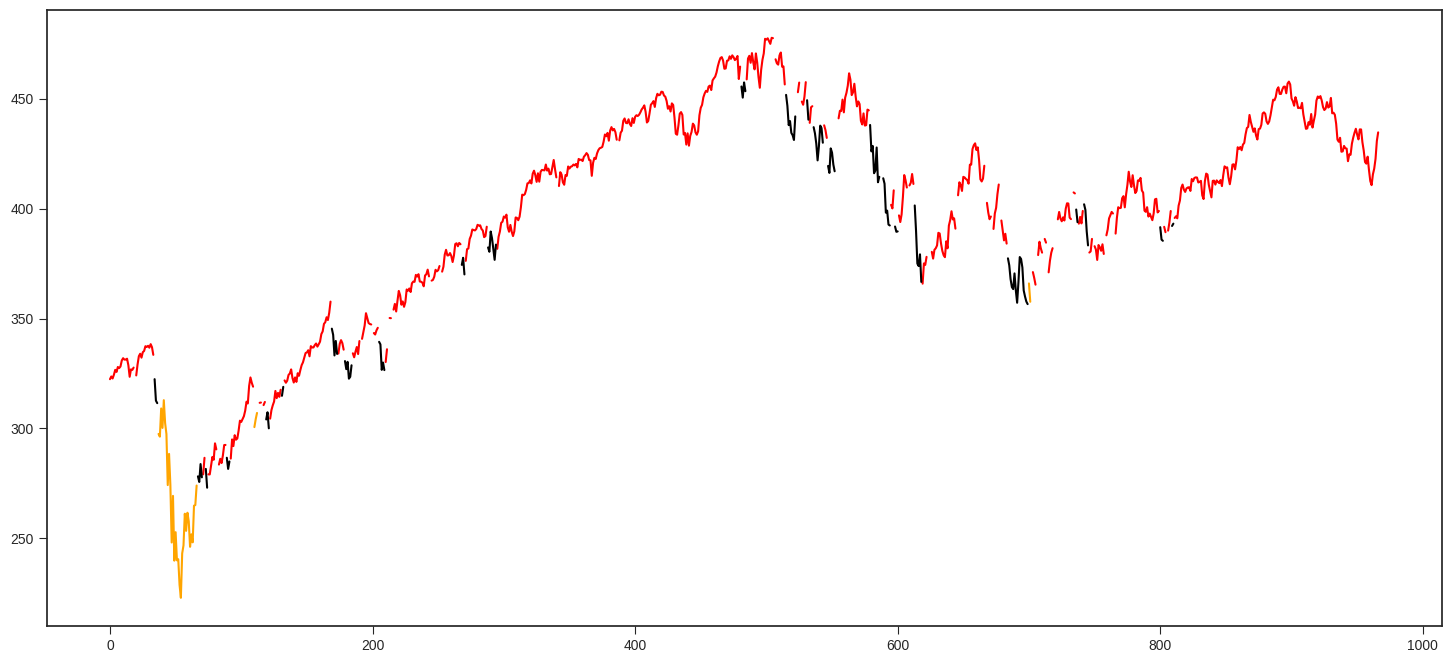

In [10]:
# Plot Chart
figure = plt.figure(figsize=(18,8))

plt.plot(labels_0,color="red")
plt.plot(labels_1,color="green")
plt.plot(labels_2,color="orange")
plt.plot(labels_3,color="black")
plt.show()

# SAVE DATA

In [12]:
df_hmm = df.copy()
df_hmm['hmm'] = hidden_states.tolist()

df_hmm.to_csv(f"data-storage/HMM-{symbol}.csv")
df_hmm

,Open,High,Low,Close,Volume,Returns,Range,hmm
Date,,,,,,,,
2020-01-03,321.160004,323.640015,321.100006,322.410004,77709700,-0.007572,0.007910,0
2020-01-06,320.489990,323.730011,320.359985,323.640015,55653900,0.003815,0.010519,0
2020-01-07,323.019989,323.540009,322.239990,322.730011,40496400,-0.002812,0.004034,0
2020-01-08,322.940002,325.779999,322.670013,324.450012,68296000,0.005330,0.009638,0
2020-01-09,326.160004,326.730011,325.519989,326.649994,48473300,0.006781,0.003717,0
...,...,...,...,...,...,...,...,...
2023-10-30,413.559998,416.679993,412.220001,415.589996,86562700,0.011956,0.010819,0
2023-10-31,416.179993,418.529999,414.209991,418.200012,79665200,0.006280,0.010430,0
2023-11-01,419.200012,423.500000,418.649994,422.660004,98068100,0.010665,0.011585,0
